This script generates the dataset starting from the raw signals taken from the mitdb wfdb database

In [7]:
import copy
import wfdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

In [8]:
# Parameters

FREQ_SAMP = 360 # Hz sampling frequency

In [9]:
# Extract data from files

# Samples from the original data to load
#SAMPLE_NUM = 10000
#record = wfdb.rdrecord('src/mitdb/100', sampto = SAMPLE_NUM)
#annotation = wfdb.rdann('src/mitdb/100', 'atr', sampto = SAMPLE_NUM)
mitdb_list = [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 200, 201, 202, 203, 205, 207, 208, 209, 210, 212, 213, 214, 215, 217, 219, 220, 221, 222, 223, 228, 230, 231, 232, 233, 234]

csv_sample = np.empty((1,4*FREQ_SAMP))
csv_categ = np.empty((1,1))

for element in mitdb_list:

    print("##########")
    print("Current record: " + str(element))

    # Load all samples
    record = wfdb.rdrecord('src/mitdb/' + str(element))
    annotation = wfdb.rdann('src/mitdb/'+str(element), 'atr')
    #display(annotation.__dict__)

    # Define dataset structure
    dataset_sample = np.ones((1,4*FREQ_SAMP))*-20.0
    dataset_categ = np.empty(1)
    print("Record shape: " + str(annotation.ann_len))

    # Read symbols and substitute them
    # Classes:  'N': Normal beat
    #           'S': Supraventricular premature
    #           'V': Premature ventricular contraction
    #           'F': Fusion of ventricular and normal beat
    #           'Q': Unclassifiable
    symbol_dict = { 'N':'N',
                    'S':'S', 'A':'S', 'a':'S', 'J':'S', 'e':'S', 'j':'S', 'x':'S',
                    'V':'V', 'L':'V', 'R':'V', 'E':'V', '[':'V', '!':'V', ']':'V',
                    'F':'F', 'f':'F',
                    'Q':'Q', '/':'Q', '|':'Q'}
    
    raw_ann_symbol = annotation.symbol.copy()
    raw_ann_symbol = [symbol_dict[key] if key in symbol_dict else key for key in raw_ann_symbol]

    print(raw_ann_symbol)
    print(annotation.sample)

    # Each sample starts at R(i-1) and ends at R(i)+ RR/2
    # With R is the R-wave peak and RR is the time between the last two R peaks
    # Ignore first samples (malformed)
    raw_sample = record.p_signal
    raw_sample = raw_sample[:,0]
    offset_i = 2
    min_i = offset_i
    max_i = offset_i
    for n in range(offset_i, annotation.ann_len):
        max_i = annotation.sample[n]
        min_i = annotation.sample[n-1]
        #print("N: " + str(n) + "  max i: " +str(max_i) +"  min i: " +str(min_i))

        # Check size of beat: if beat too long or short ignore it
        if((max_i-min_i < 2.5*FREQ_SAMP) and (max_i-min_i > 0.5*FREQ_SAMP)):
            tmp_vec = raw_sample[min_i:max_i+int((max_i-min_i)/2)]
            #dataset_sample[n-offset_i, :tmp_vec.shape[0]] = tmp_vec
            dataset_vec =  np.ones((1, 4*FREQ_SAMP))*-20.0
            dataset_vec[0, :tmp_vec.shape[0]] = tmp_vec
            dataset_sample = np.append(dataset_sample, dataset_vec, axis=0)
            dataset_categ = np.append(dataset_categ, raw_ann_symbol[n])
            #dataset_categ = np.append(dataset_categ, annotation.symbol[n])
            #min_i = max_i

    # Delete wrong lines
    dataset_sample = np.delete(dataset_sample, 0, axis=0)
    dataset_categ = np.delete(dataset_categ, 0, axis=0)

    # Append data for file write
    print("Appending " + str(len(dataset_sample)) + " records and " + str(len(dataset_categ)) + " categories")
    csv_sample = np.append(csv_sample, dataset_sample, axis=0)
    csv_categ = np.append(csv_categ, dataset_categ)

# Delete wrong lines
csv_sample = np.delete(csv_sample, 0, axis=0)
csv_categ = np.delete(csv_categ, 0, axis=0)

# Store samples to file
np.savetxt("src/dataset_data.csv", csv_sample, delimiter=";", fmt="%.3f")
np.savetxt("src/dataset_categ.csv", csv_categ, delimiter=";", fmt="%s")


##########
Current record: 100
Record shape: 2274
['+', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'S', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',

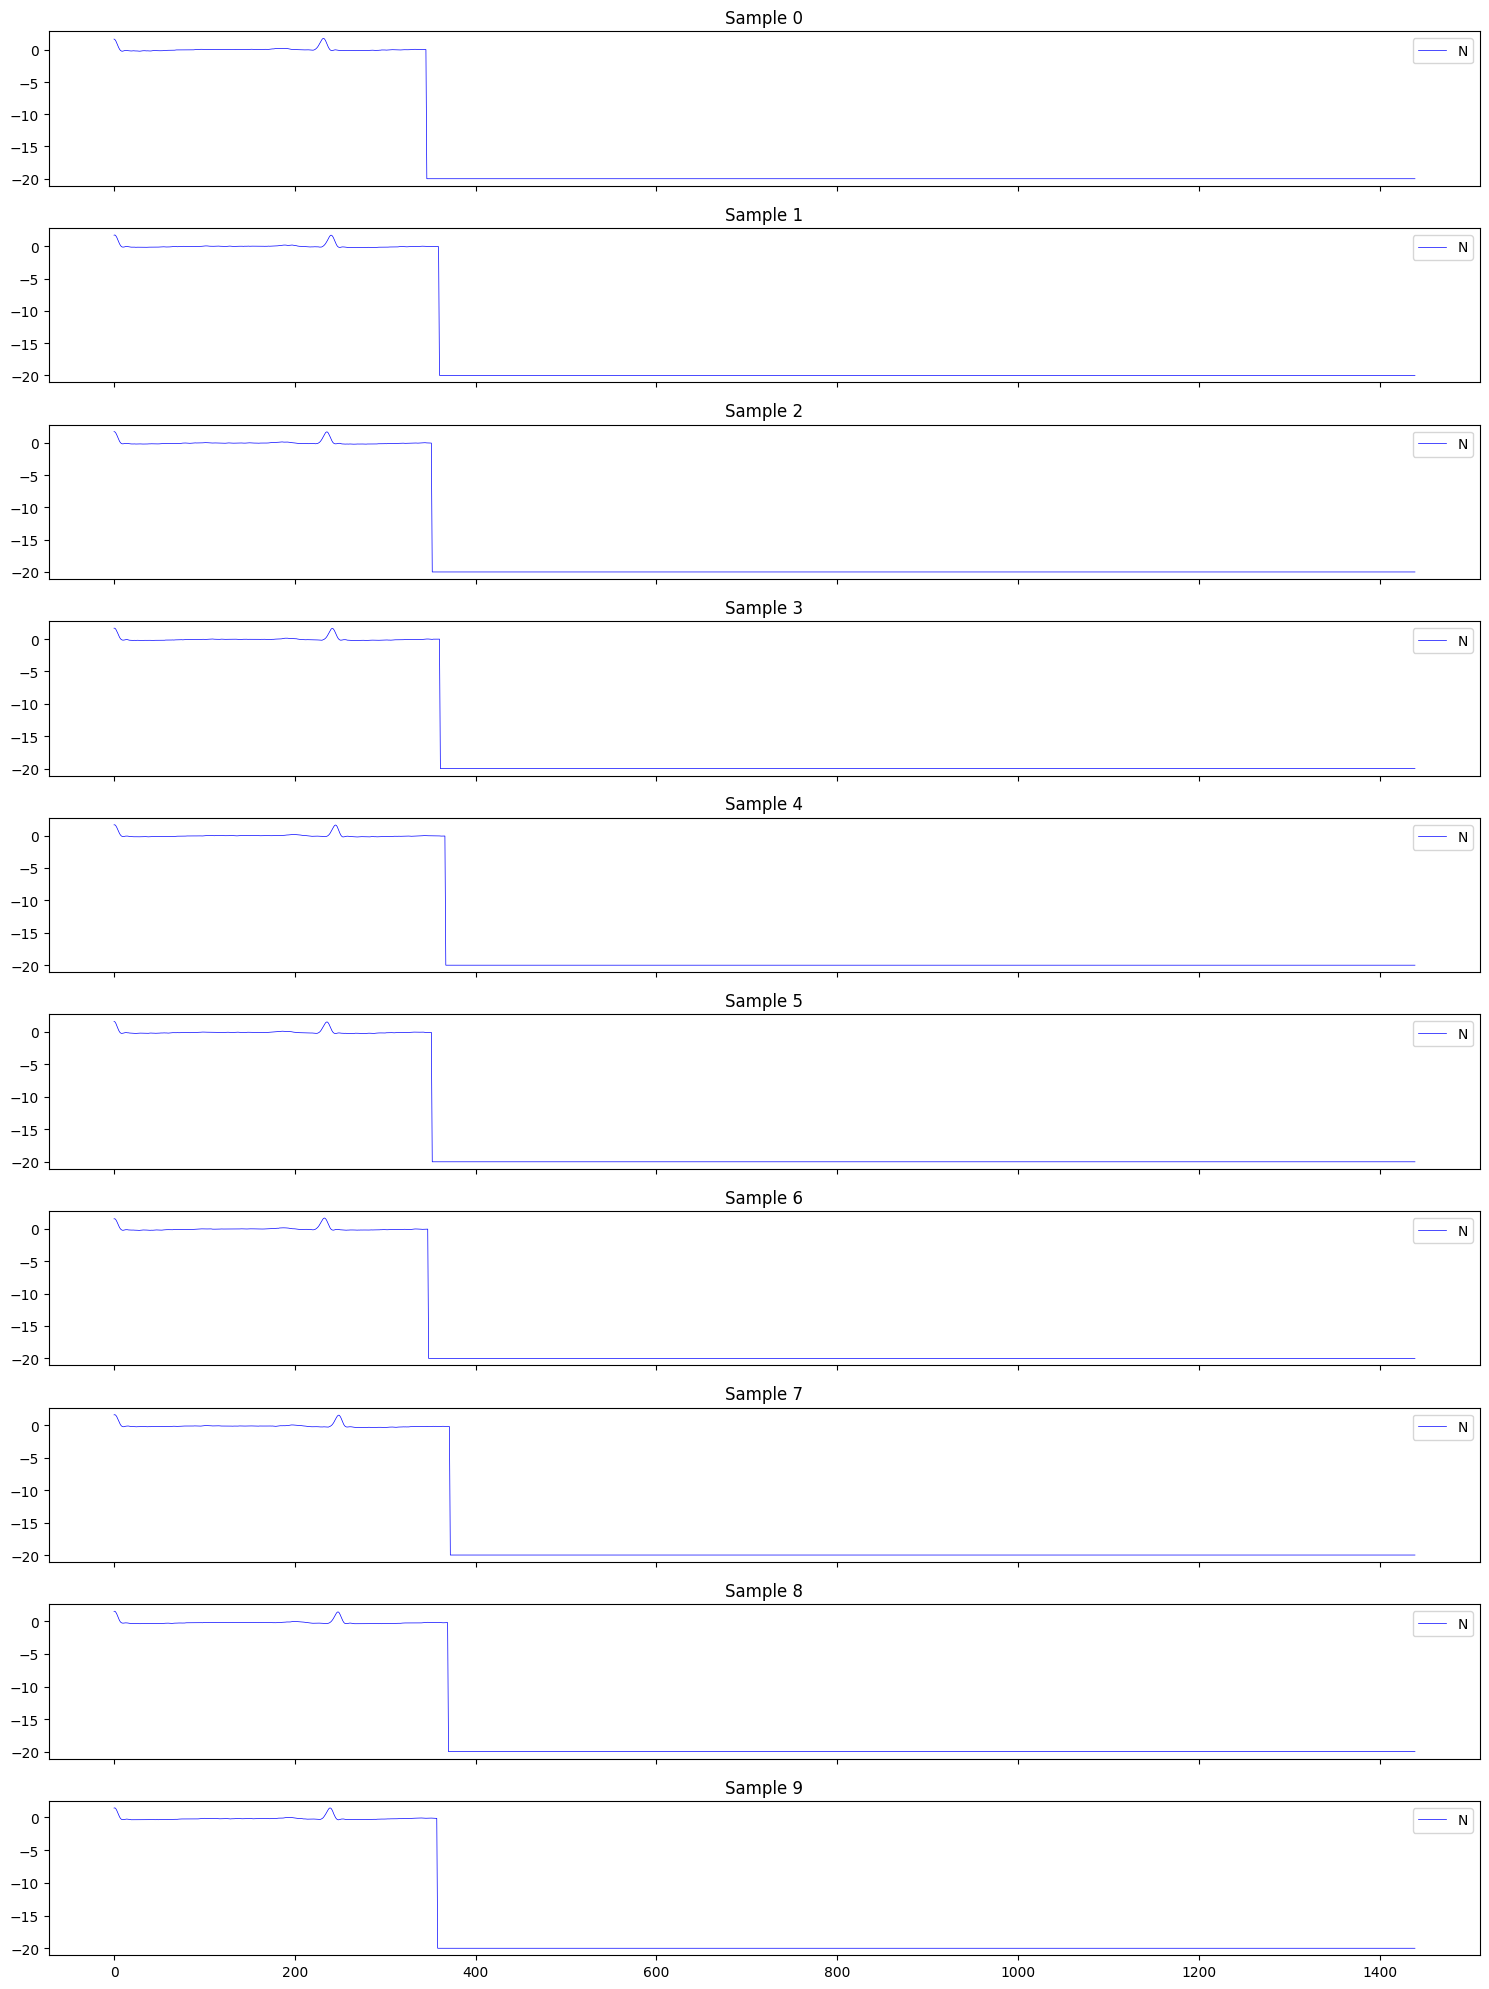

In [10]:
PLT_NUM = 10

# Create plots
#fig, axs = plt.subplots(5, 4, sharex=True)
fig, axs = plt.subplots(PLT_NUM, 1, sharex=True)
fig.set_size_inches(15, PLT_NUM*2)
#fig.suptitle("ECG Signal conditioning")
#axs[n].set_xlim(X_MIN, X_MAX)

for n in range(PLT_NUM):
    # Plot
    axs[n].title.set_text('Sample ' + str(n))
    axs[n].plot(dataset_sample[n][dataset_sample[n] != 20], linewidth=0.5, color="blue", label=dataset_categ[n])
    axs[n].legend()
    #n += 1

plt.tight_layout()
plt.show()